## Heart Attack Risk Predictor

### In this project, we aim to develop an application designed to assist in forecasting an individual's risk of experiencing a heart attack. We will employ a variety of algorithms to anticipate outcomes, determining the most suitable one through evaluation. Additionally, we will utilize the Auto ML Library EVAL ML for result prediction.

#### source:https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data 

### We will do the following things:
- Data Analysis 
- Feature Engineering 
- Satandardization
- Model Building
- Predictions

### Let's begin by importing the required libraries and reading our dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let us import our Data Set

In [2]:
df = pd.read_csv(r"C:\Users\ERMI\Desktop\Heart Attack Risk Prediction\heart.csv")

In [3]:
# Dropping columns 'oldpeak', 'slp', 'thall' from the DataFrame
df= df.drop(['oldpeak', 'slp', 'thall'],axis=1)

In [4]:
# Display the first few rows of the DataFrame
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Data Analysis

### Understanding our DataSet:

- **Age:** Age of the patient

- **Sex:** Sex of the patient

- **exang:** Exercise induced angina (1 = yes; 0 = no)

- **ca:** Number of major vessels (0-3)

- **cp:** Chest Pain type
  - Value 0: Typical angina
  - Value 1: Atypical angina
  - Value 2: Non-anginal pain
  - Value 3: Asymptomatic

- **trtbps:** Resting blood pressure (in mm Hg)

- **chol:** Cholestoral in mg/dL fetched via BMI sensor

- **fbs:** (fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)

- **rest_ecg:** Resting electrocardiographic results
  - Value 0: Normal
  - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

- **thalach:** Maximum heart rate achieved

- **target:** 0 = Less chance of heart attack, 1 = More chance of heart attack


In [5]:
# Get the shape (number of rows and columns) of the DataFrame 'df'
df.shape

(303, 11)

In [6]:
# Check for missing values in the DataFrame 'df' and calculate the sum of missing values for each column
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [7]:
# Calculate the correlation matrix for the DataFrame 'df'
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

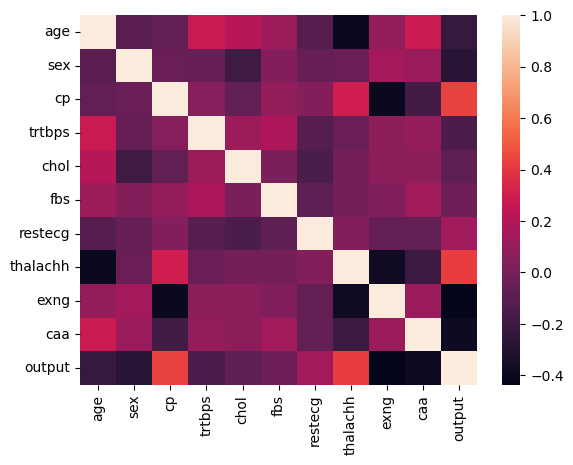

In [8]:
sns.heatmap(df.corr())

### As evident from our data, there is no significant correlation among our variables.

#### We will do Uni and Bi variate analysis on our Features

<Axes: title={'center': 'Age of Patients'}, xlabel='age', ylabel='count'>

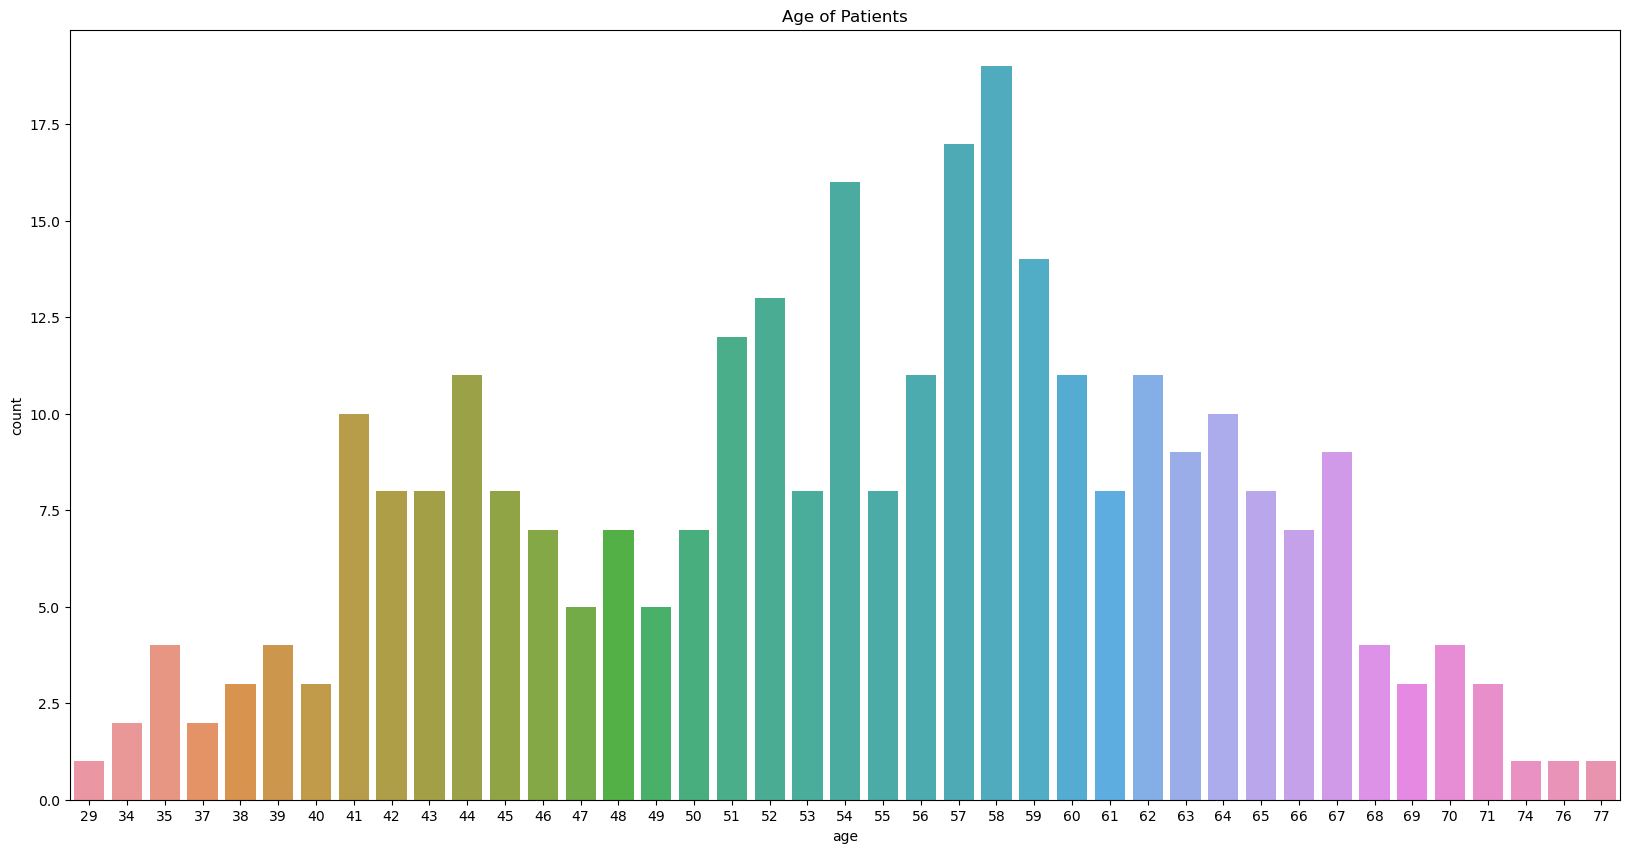

In [9]:
# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Set the title for the plot
plt.title("Age of Patients")

# Set the label for the x-axis
plt.xlabel("Age")

# Create a countplot to visualize the distribution of 'age'
sns.countplot(x='age', data=df)

### Clearly, the majority of patients fall within the age group of 51 to 67 years.

<Axes: title={'center': 'Sex of Patients, 0=Female and 1=Male'}, xlabel='sex', ylabel='count'>

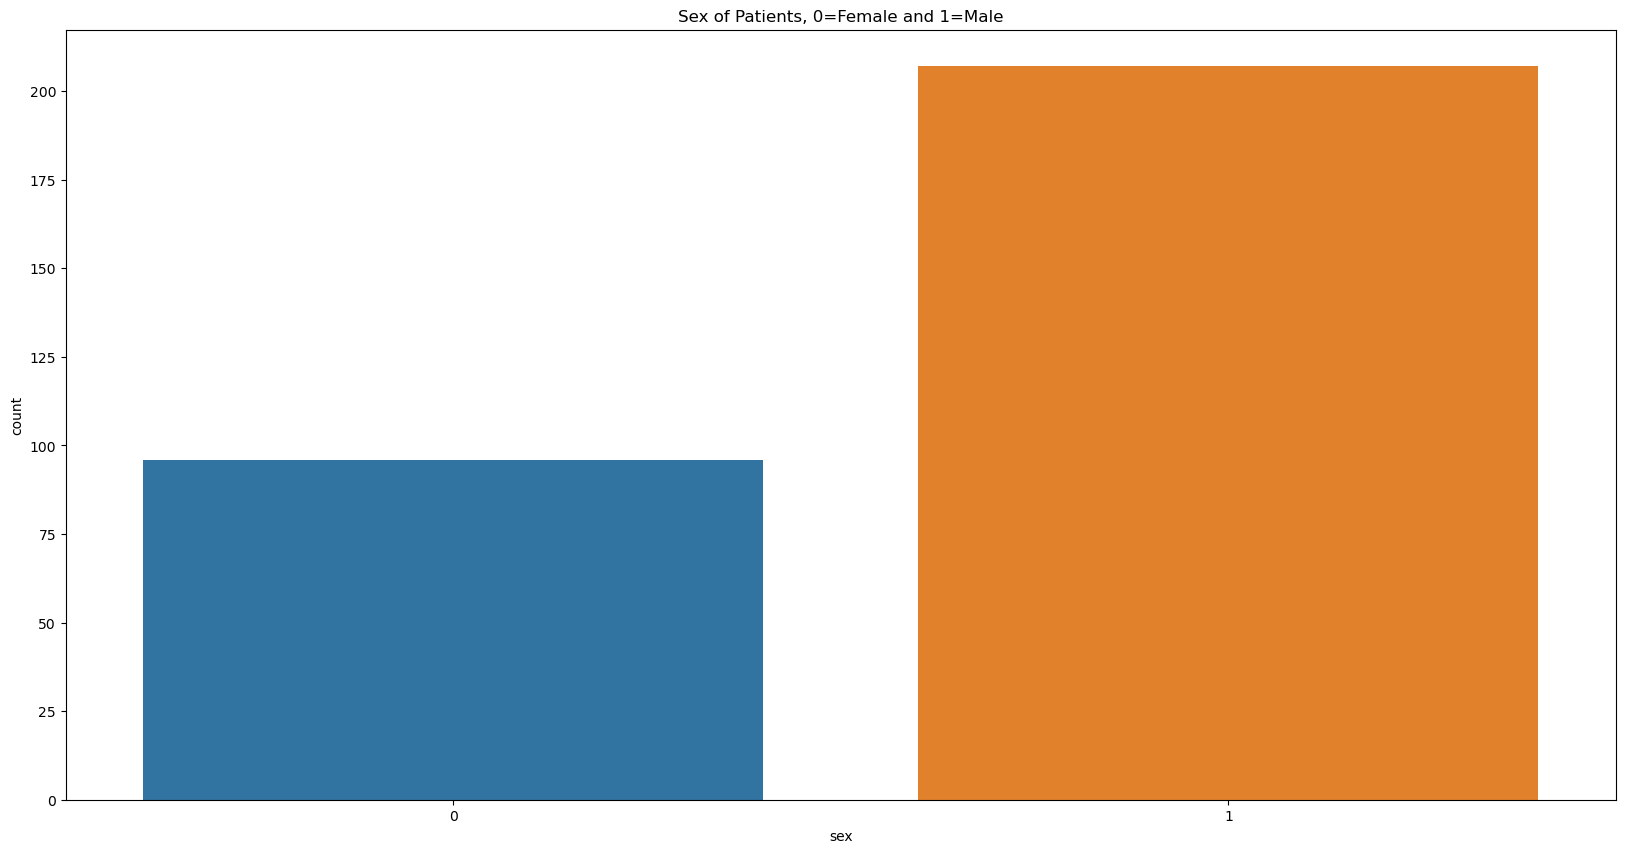

In [10]:
# Set the figure size for the plot
plt.figure(figsize=(20, 10))

# Set the title for the plot
plt.title("Sex of Patients, 0=Female and 1=Male")

# Create a countplot to visualize the distribution of 'sex'
sns.countplot(x='sex', data=df)

In [11]:
# Create a DataFrame 'cp_data' with value counts of the 'cp' column
cp_data = df['cp'].value_counts().reset_index()

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
cp_data_copy = cp_data.copy()

# Modify the labels using the numeric indices
cp_data.loc[3, 'index'] = 'Asymptomatic'
cp_data.loc[2, 'index'] = 'Non-Anginal'
cp_data.loc[1, 'index'] = 'Atypical Angina'
cp_data.loc[0, 'index'] = 'Typical Angina'

# Display the modified DataFrame 'cp_data'
cp_data


,cp,count,index
0,0,143,Typical Angina
1,2,87,Atypical Angina
2,1,50,Non-Anginal
3,3,23,Asymptomatic


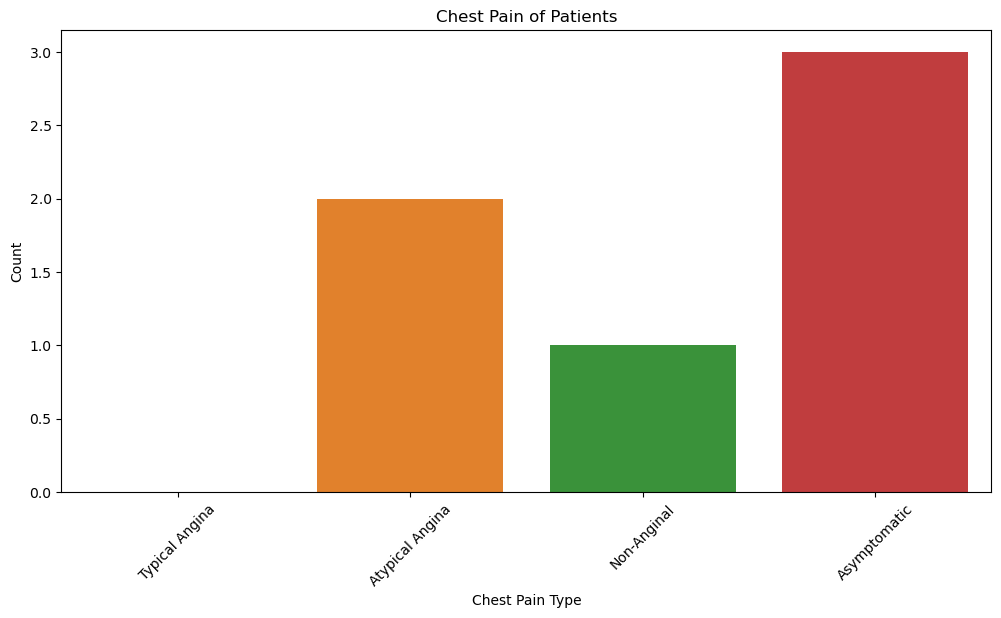

In [12]:
# Create a bar plot for chest pain data with the modified labels
plt.figure(figsize=(12, 6))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'], y=cp_data['cp'])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [13]:
# Create a DataFrame 'ecg_data' with value counts of the 'restecg' column
ecg_data = df['restecg'].value_counts().reset_index()

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
ecg_data_copy = ecg_data.copy()

# Modify the labels for better description
ecg_data.loc[0, 'index'] = 'Normal'
ecg_data.loc[1, 'index'] = 'ST-T Wave Abnormality'
ecg_data.loc[2, 'index'] = 'Probable or Definite Left Ventricular Hypertrophy by Estes'

# Display the modified DataFrame 'ecg_data'
ecg_data

,restecg,count,index
0,1,152,Normal
1,0,147,ST-T Wave Abnormality
2,2,4,Probable or Definite Left Ventricular Hypertro...


<Axes: title={'center': 'ECG Data of Patients'}, xlabel='index', ylabel='restecg'>

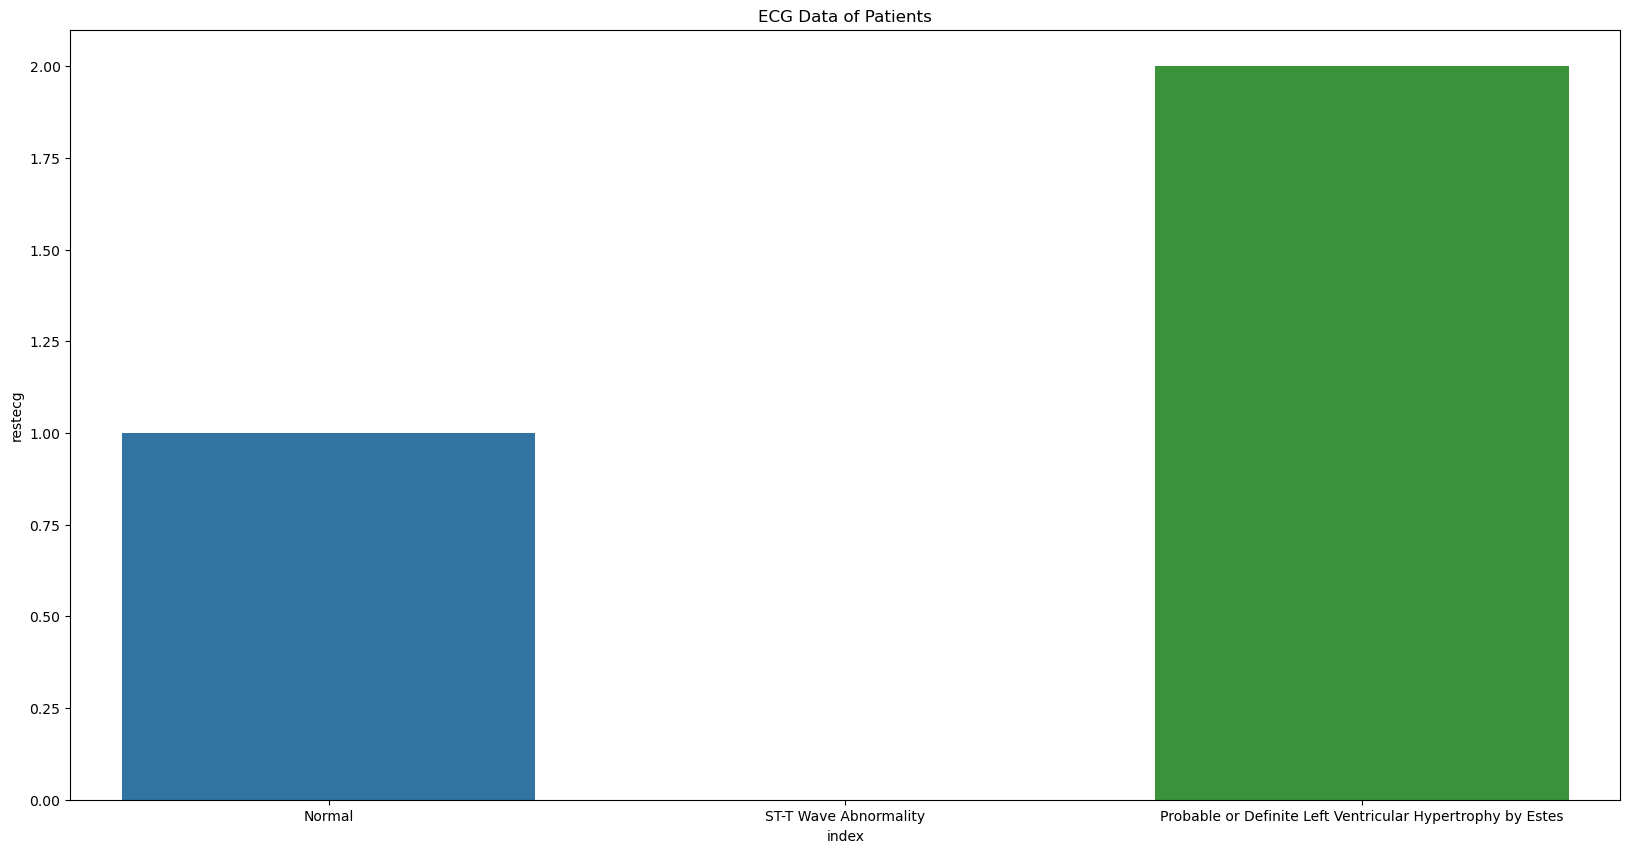

In [17]:
# Create a bar plot for ECG data with the modified labels
plt.figure(figsize=(20,10))
plt.title("ECG Data of Patients")

sns.barplot(x=ecg_data['index'], y=ecg_data['restecg'])

### In this code, 'output' is used as the hue parameter to distinguish between different values in the 'output' column, creating different colors for the two groups (0 and 1). This will allow to visualize the relationships between features while considering the 'output' as the grouping factor.

c:\Users\ERMI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


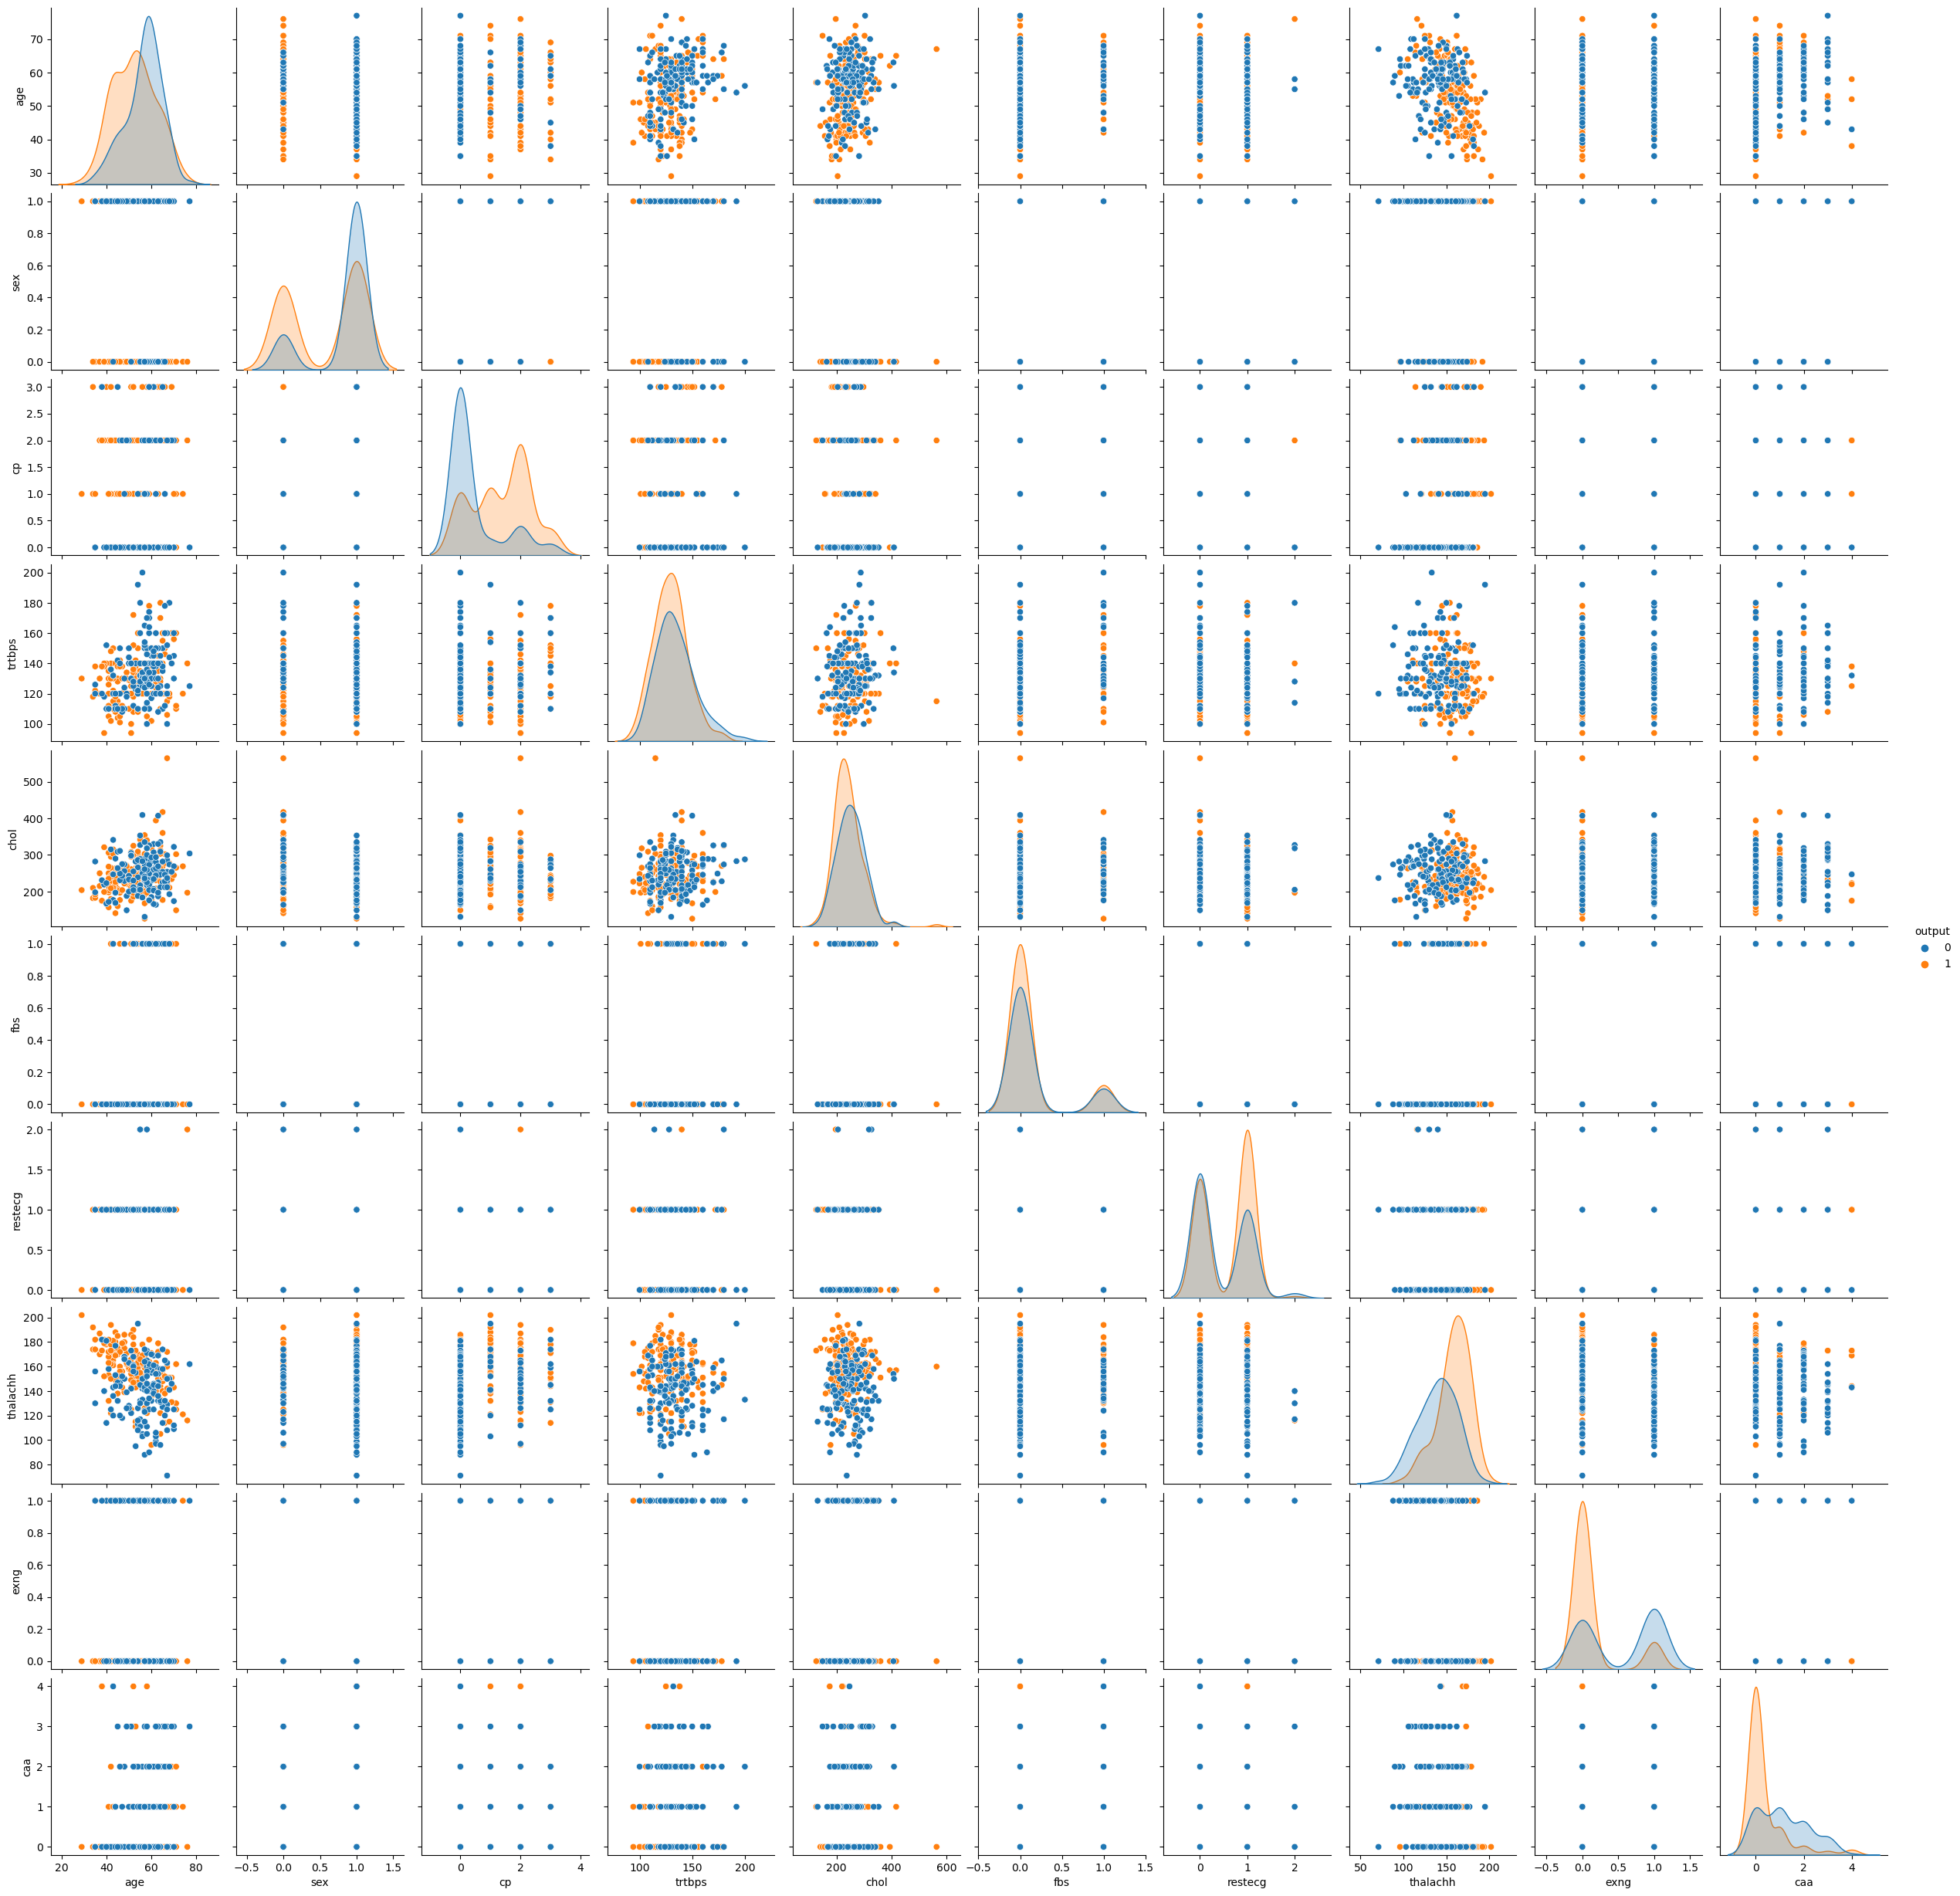

In [18]:
# Specify a categorical column as the hue
sns.pairplot(df, hue='output')
plt.show()

### Let's examine our continuous variables.

Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

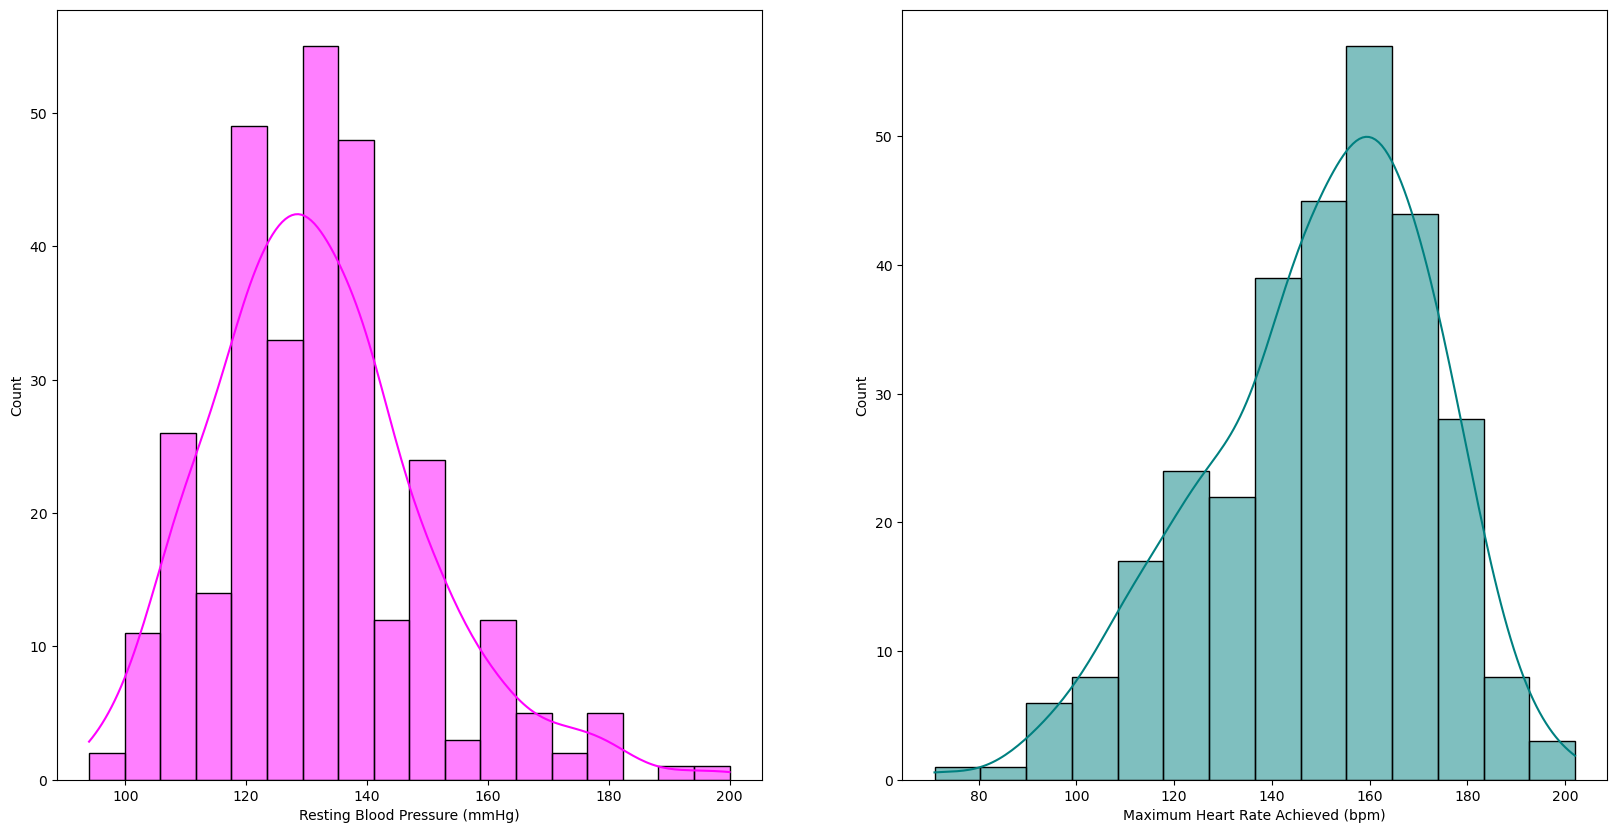

In [20]:
# Create a figure with two subplots
plt.figure(figsize=(20, 10))

# Subplot 1: Distribution of Resting Blood Pressure
plt.subplot(1, 2, 1)
sns.histplot(df['trtbps'], kde=True, color='magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")

# Subplot 2: Distribution of Maximum Heart Rate Achieved
plt.subplot(1, 2, 2)
sns.histplot(df['thalachh'], kde=True, color='teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

Text(0.5, 0, 'Cholesterol')

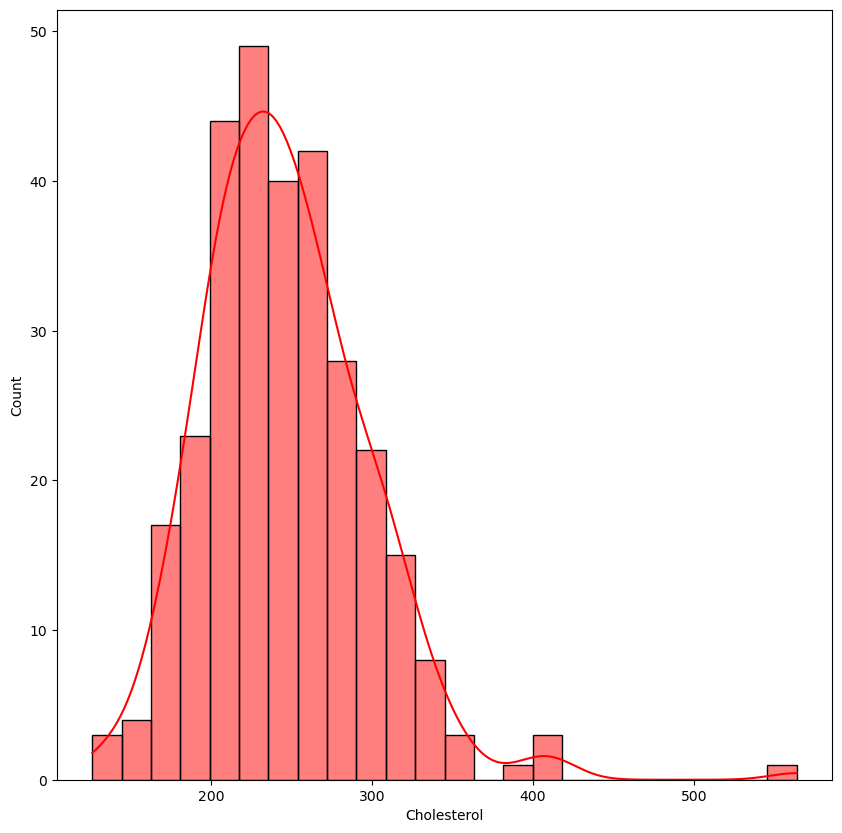

In [21]:
# Create a Matplotlib figure with a size of 10x10
plt.figure(figsize=(10,10))

# Create a histogram and KDE plot for the 'chol' column
sns.histplot(df['chol'], kde=True, color='red')

# Set the x-axis label
plt.xlabel('Cholesterol')

### We've completed the data analysis; now, let's take a closer look at our data.

In [22]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


### Let's proceed with standardization.

In [23]:
from sklearn.preprocessing import StandardScaler

In [27]:
# Create an instance of the StandardScaler
scale = StandardScaler()

In [28]:
# Fit the scaler to your data and transform the data
scale.fit(df)

StandardScaler()

In [29]:
# Apply a scaling or transformation to the DataFrame 'df' using a 'scale' object.
df= scale.transform(df)

In [30]:
# Create a new DataFrame 'df' by reassigning it
df = pd.DataFrame(df, columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'output'])

In [16]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### We can incorporate this data into our machine learning models.

### We will use the following models for our predictions:
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbor
- Support Vector Machine (SVM)


### Next, we will utilize ensemble methods.

#### Let us split our data

In [15]:
# Extract the feature columns from the DataFrame 'df' and store them in 'x'
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
# Extract the feature columns from the DataFrame 'df' and store them in 'y'
y= df.iloc[:,-1:]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [12]:
from sklearn.model_selection import train_test_split

# Split the feature data (x) and target variable (y) into training and testing sets
# - x_train: Training data for features
# - x_test: Testing data for features
# - y_train: Training data for the target variable
# - y_test: Testing data for the target variable
# - test_size: Specifies the proportion of the dataset to include in the test split (in this case, 30%)
# - random_state: A random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)


## Logistic Regression

In [9]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

In [8]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

In [10]:
 # Create an instance of the LabelEncoder class
lbl = LabelEncoder()

In [18]:
# Before applying LabelEncoder, reshape 'y_train' using ravel()
y_train = y_train.values.ravel()

# Now you can use 'y_train' as a one-dimensional array with shape (n_samples,)
encoded_y = lbl.fit_transform(y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [40]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

In [41]:
# Create an instance of the LogisticRegression model
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
# - 'x_train': The feature data used for training
# - 'encoded_y': The encoded target variable
logreg.fit(x_train, encoded_y)

LogisticRegression()

In [44]:
Y_prediction1 = logreg.predict(x_test)
Y_prediction1

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
# Before applying LabelEncoder, we are reshape 'y_test' using ravel()
y_test = y_test.values.ravel()

# Now we can use 'y_test' as a one-dimensional array with shape (n_samples,)
encoded_ytest = lbl.fit_transform(y_test)

In [48]:
# Use the logistic regression model to make predictions on the testing data
Y_prediction1 = logreg.predict(x_test)

# Calculate the confusion matrix to assess the model's performance
# - 'encoded_ytest' is the true target values
# - 'Y_pred1' is the predicted values
lr_conf_matrix = confusion_matrix(encoded_ytest, Y_prediction1)

# Calculate the accuracy score to measure the model's overall accuracy
# - 'encoded_ytest' is the true target values
# - 'Y_pred1' is the predicted values
lr_acc_score = accuracy_score(encoded_ytest, Y_prediction1)


In [49]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]], dtype=int64)

In [50]:
# Print the accuracy score as a percentage
print(lr_acc_score*100, "%")

85.71428571428571 %


### As observed, the Logistic Regression Model demonstrates an 85% level of accuracy.

## Decision Tree

In [51]:
# Import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

In [52]:
tree = DecisionTreeClassifier()

In [53]:
tree.fit(x_train, encoded_y)

DecisionTreeClassifier()

In [54]:
Y_prediction2 = tree.predict(x_test)

In [55]:
encoded_ytest = lbl.fit_transform(y_test)

In [56]:
tree_conf_matrix = confusion_matrix(encoded_ytest, Y_prediction2)
tree_acc_score = accuracy_score(encoded_ytest, Y_prediction2)

In [57]:
tree_conf_matrix

array([[26, 18],
       [10, 37]], dtype=int64)

In [58]:
print(tree_acc_score*100, "%")

69.23076923076923 %


### We can see that our Decision Tree Model doesn't do very well because it only has a 69% score.

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf = RandomForestClassifier()

In [61]:
rf.fit(x_train, encoded_y)

RandomForestClassifier()

In [62]:
Y_prediction3 = rf.predict(x_test)

In [63]:
rf_conf_matrix = confusion_matrix(encoded_ytest, Y_prediction3)
rf_acc_score = accuracy_score(encoded_ytest, Y_prediction3)

In [64]:
rf_conf_matrix

array([[32, 12],
       [ 7, 40]], dtype=int64)

In [67]:
print(rf_acc_score*100, "%")

79.12087912087912 %


## Random Forest also provides us with an accuracy of approximately 80%

### K Nearest Neighbour

#### We need to determine the optimal value of 'k' for achieving the highest accuracy.
#### Let's create a function for this purpose.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
# Create an empty list to store the error rates for different 'k' values
error_rate = []

# Iterate over a range of 'k' values from 1 to 40
for i in range(1, 40):
    # Create a KNN classifier with 'n_neighbors' set to the current 'k' value
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Fit the KNN classifier to the training data
    knn.fit(x_train, encoded_y)
    
    # Make predictions on the testing data
    pred = knn.predict(x_test)
    
    # Calculate the error rate and append it to the 'error_rate' list
    error_rate.append(np.mean(pred != encoded_ytest))


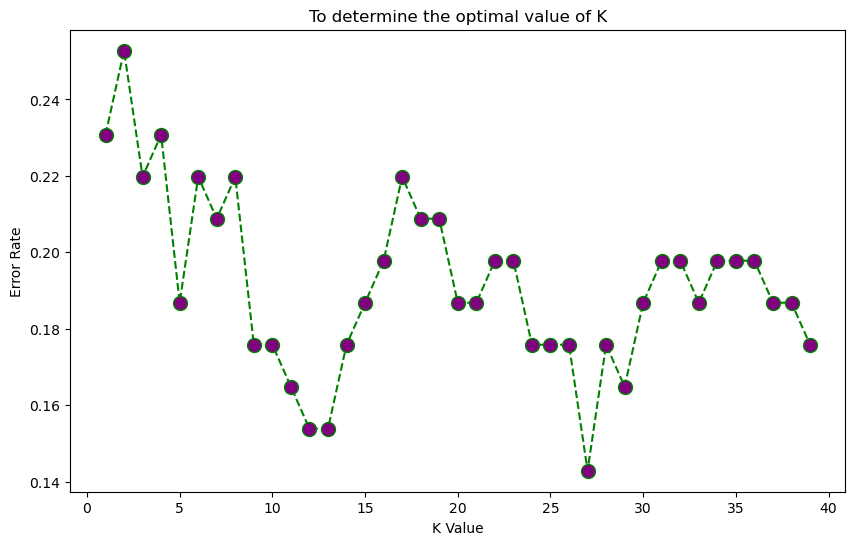

In [75]:
plt.figure(figsize=(10, 6))

# Create a line plot with circles and a dashed line connecting the points
# - The x-axis represents the 'k' values (from 1 to 40)
# - The y-axis represents the error rates (calculated previously)
# - 'color' sets the color of the line to blue
# - 'linestyle' sets the line style to dashed
# - 'marker' adds circles at the data points
# - 'markerfacecolor' sets the color of the marker circles to red
# - 'markersize' adjusts the size of the marker circles
plt.plot(range(1,40), error_rate, color='green', linestyle='dashed', marker='o',
        markerfacecolor='purple', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('To determine the optimal value of K')
plt.show()

#### From the graph, it is evident that the optimal choice for 'k' should be 12 since it results in the lowest error rate.

In [76]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, encoded_y)
Y_prediction4 = knn.predict(x_test)

In [77]:
knn_conf_matrix = confusion_matrix(encoded_ytest, Y_prediction4)
knn_acc_score = accuracy_score(encoded_ytest, Y_prediction4)

In [78]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]], dtype=int64)

In [79]:
print(knn_acc_score*100, '%')

84.61538461538461 %


### As observed, the K-nearest neighbors (KNN) model provides an accuracy of approximately 85%, indicating a favorable performance.

### Support Vector Machine(SVM)

In [80]:
from sklearn import svm

In [81]:
svm = svm.SVC()

In [82]:
svm.fit(x_train, encoded_y)

SVC()

In [83]:
Y_prediction5 = svm.predict(x_test)

In [84]:
svm_conf_matrix = confusion_matrix(encoded_ytest, Y_prediction5)
svm_acc_score = accuracy_score(encoded_ytest, Y_prediction5)

In [85]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]], dtype=int64)

In [86]:
print(svm_acc_score*100, '%')

80.21978021978022 %


#### In the case of the Support Vector Machine (SVM), we achieve an accuracy rate of 80%.

#### Let's visualize our model accuracy in tabular form.

In [87]:
model_accuracy = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Nearest Neighbor', 'SVM'], 'Accuracy' : [lr_acc_score*100, tree_acc_score*100, rf_acc_score*100, knn_acc_score*100, svm_acc_score*100]})

In [88]:
model_accuracy = model_accuracy.sort_values(by=['Accuracy'], ascending=False)

In [89]:
model_accuracy

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
4,SVM,80.219780
2,Random Forest,79.120879
1,Decision Tree,69.230769


#### Let's construct a comprehensive confusion matrix for our model.

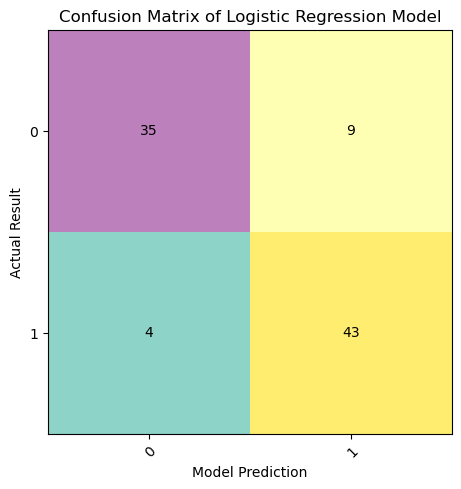

Accuracy of out model is  85.71428571428571 %


In [93]:
# List of class labels for model predictions
options = ["Disease", "No Disease"]

# Create a figure and axes for plotting
fig, ax = plt.subplots()

# Display the confusion matrix as an image
im = ax.imshow(lr_conf_matrix, cmap='Set3', interpolation='nearest')

# Set tick positions on the x and y axes
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))

# Rotate the x-axis tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Annotate the confusion matrix values on the plot
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrix[i, j], ha='center', va='center', color='black')

# Set the title for the confusion matrix plot
ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()

# Label the x and y axes
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')

plt.show()
print("Accuracy of out model is ", lr_acc_score*100, "%")

#### We have successfully developed our model, which can predict whether a person is at risk of heart disease with an accuracy of 85.7%.

In [6]:
import pickle

In [3]:
pickle.dump(logreg,open('heart.pkl','wb'))

NameError: name 'pickle' is not defined

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [5]:
# Define individual models
rf_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
logistic_model = LogisticRegression()
svm_model = SVC()

# Create a voting ensemble of different models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('adaboost', adaboost_model),
    ('logistic', logistic_model),
    ('svm', svm_model)
], voting='soft')  # 'soft' uses predicted probabilities for voting

# Fit the ensemble model to the training data
ensemble_model.fit(x_train, encoded_y)


NameError: name 'LogisticRegression' is not defined